# Проект: Исследование сервиса аренды самокатов GoFast  <a class="tocSkip">
Имеются данные от популярного сервиса аренды самокатов GoFast о некоторых пользователях из нескольких городов, а также об их поездках. 

Цель проекта: проверить гипотезы на основе данных, которые могут помочь бизнесу вырасти.

**Детали.**
    
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
 - без подписки
    - абонентская плата отсутствует;
    - стоимость одной минуты поездки —8 рублей;
    - стоимость старта (начала поездки) —50 рублей;
 - с подпиской Ultra
    - абонентская плата —199 рублей в месяц;
    - стоимость одной минуты поездки —6 рублей;
    - стоимость старта — бесплатно.


In [1]:
# загрузка библиотек
import pandas as pd

# Математика
import numpy as np

#графики
import matplotlib.pyplot as plt

import seaborn as sns

# проверка гипотез
import scipy.stats as st

## Шаг 1: Загрузка данных

###  Загрузка датасетов в датафреймы
Считаем CSV-файлы с данными с помощью библиотеки pandas и сохраним их в датафреймы. 
Пути к файлам локально: `C:\Users\79181\notebook_notebook\projects\go_datasets`:
 - users_go.csv
 - rides_go.csv
 - subscr.csv
 
 Пути к файлам по ссылкам : 
 - users_go.csv - 'https://code.s3.yandex.net/datasets/users_go.csv'
 - rides_go.csv - https://code.s3.yandex.net/datasets/subscriptions_go.csv'
 - subscr.csv - 'https://code.s3.yandex.net/datasets/subscriptions_go.csv'
 

In [2]:
# загрузка датасета users_go.csv в датафрейм для анализа
try:
    users = pd.read_csv(
    r'C:\Users\79181\notebook_notebook\projects\go_datasets\users_go.csv')
except:
    users = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv')

In [3]:
# загрузка датасета rides_go.csv в датафрейм
try:
    rides = pd.read_csv(
    r'C:\Users\79181\notebook_notebook\projects\go_datasets\rides_go.csv')
except:
    rides = pd.read_csv(
        'https://code.s3.yandex.net/datasets/rides_go.csv')

In [4]:
# загрузка датасета rides_go.csv в датафрейм
try:
    subscr = pd.read_csv(
    r'C:\Users\79181\notebook_notebook\projects\go_datasets\subscr_go.csv')
except:
    subscr = pd.read_csv(
        'https://code.s3.yandex.net/datasets/subscriptions_go.csv')

### Описание данных в датасетах
В основных данных есть информация о пользователях, их поездках и подписках.
 - Пользователи — users_go.csv
     - user_id	уникальный идентификатор пользователя
     - name	имя пользователя
     - age	возраст
     - city	город
     - subscription_type	тип подписки (free, ultra)
 - Поездки — rides_go.csv
     - user_id	уникальный идентификатор пользователя
     - distance	расстояние, которое пользователь проехал в текущей сессии (в метрах)
     - duration	продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
     - date	дата совершения поездки
 - Подписки — subscriptions_go.csv
     - subscription_type	тип подписки
     - minute_price	стоимость одной минуты поездки по данной подписке
     - start_ride_price	стоимость начала поездки
     - subscription_fee	стоимость ежемесячного платежа


### Знакомство с данными
Выведем первые строки каждого набора данных. Изучим общую информацию о каждом датафрейме.
### Список датафремов

In [5]:
# список датафреймов
df_list = [users,
            rides,
            subscr]
# список датафреймов
df_name_list = ['users',
            'rides',
            'subscr']

### Общая информация по датафрейму

In [6]:
for i, df in enumerate(df_list):
    print(f'✔️ Общая информация для датафрема {df_name_list[i]}:\n\
-----------------------------------------------------')
    df.info()
    print('-----------------------------------------------------')
    print(f'Пропусков в датафреме {df_name_list[i]} =\
    {df.isnull().sum().sum()} шт.')
    print('-----------------------------------------------------')
    print(f'Первые строки датафрема {df_name_list[i]}:')
    display(df.head(2))
    print(f'-----------------------------------------------------')


✔️ Общая информация для датафрема users:
-----------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
-----------------------------------------------------
Пропусков в датафреме users =    0 шт.
-----------------------------------------------------
Первые строки датафрема users:


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra


-----------------------------------------------------
✔️ Общая информация для датафрема rides:
-----------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB
-----------------------------------------------------
Пропусков в датафреме rides =    0 шт.
-----------------------------------------------------
Первые строки датафрема rides:


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18


-----------------------------------------------------
✔️ Общая информация для датафрема subscr:
-----------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes
-----------------------------------------------------
Пропусков в датафреме subscr =    0 шт.
-----------------------------------------------------
Первые строки датафрема subscr:


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


-----------------------------------------------------


 ### Итоги шага 1
 Успешно загружено 3 датасета в датафремы 'users', 'rides', 'subscr'.
 
 1. Количество строк, столбцов:
 - Датафрем users содержит
   - 1565 строк,
   - 5 столбцов. 
 - Датафрем rides  содрежит
   - 18068 строк
   - 4 столбца. 
 
 - Датафрем subscr   содрежит
   - 2 строки
   - 4 столбца. 
  
2. Стиль написания.  

Названия столбцов в датафреймах 'users', 'rides', 'subscr' соответствуют стилю snake_case.
3. Типы данных в датафреймах.

Типы данных в столбцах датафреймов 'users', 'rides', 'subscr':
     - object
     - float64
     - int64  
     
В датафреймах users и  subscr - типы данных во всех столбцах соответствуют содержимому.  
В датафрейме rides - тип данных в столбце date не соответствуют содержимому. Требуется привести к типу даты в pandas.

4. Пропуски.

Данных с содержанием null в датафреймах 'users', 'rides', 'subscr' нет.
 

## Шаг 2: Предобработка данных


###  Замена типа данных
Приведем столбец date датафрейма rides к типу даты pandas.

In [7]:
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d')
print('\nТип данных в столбце date датафрейма rides после замены: \
{}.'.format(rides['date'].dtypes))


Тип данных в столбце date датафрейма rides после замены: datetime64[ns].


### Добавление столбца с месяцем
Для дальнейшего анализа нам понадобятся обобщенные данные по месяцам. Для этого создадим новый столбец с номером месяца на основе столбца date в датафрейме rides.  
Используем метод dt.month() для объекта типа datetime. 

In [8]:
# добавляем столбец с месяцем
rides['month'] = rides['date'].dt.month
# смотрим что получилось
rides.sample(n=2, random_state=1)

,user_id,distance,duration,date,month
4019,433,2594.466053,20.783398,2021-07-06,7
9183,900,2579.925628,16.674721,2021-03-10,3


In [9]:
# какие месяцы выделены
sorted(rides['month'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

Успешно добавлен столбец с месяцем, в котором выделены все 12 месяцев с 1 по 12, с января по декабрь соответственно.


### Пропуски и дубликаты
Проверим наличие пропущенных значений и дубликатов в датафреймах. Обработайте их, если такие значения присутствуют.

#### Пропуски
Явных пропусков нет, это мы выяснили ранее. Проверим, нет ли в данных значений, которые можно интерпретировать как пропуски, так нащываемые заглушки.
Для этого посмотрим на уникальные значения в столбцах, в которых могут быть заглушки.

In [10]:
print('В столбце users.city уникальных значений =', users.city.nunique())
print('Это:', sorted(list(users.city.unique())))

В столбце users.city уникальных значений = 8
Это: ['Екатеринбург', 'Краснодар', 'Москва', 'Омск', 'Пятигорск', 'Ростов-на-Дону', 'Сочи', 'Тюмень']


In [11]:
print('В столбце users.subscription_type уникальных значений =',
users.subscription_type.nunique())
print('Это:', list(users.subscription_type.unique()))

В столбце users.subscription_type уникальных значений = 2
Это: ['ultra', 'free']


In [12]:
print('В столбце users.name уникальных значений =', users.name.nunique())
print('Это:', sorted(list(users.name.unique())))

В столбце users.name уникальных значений = 194
Это: ['Агата', 'Аделина', 'Адель', 'Айдар', 'Александр', 'Александра', 'Алексей', 'Алина', 'Алиса', 'Алия', 'Алла', 'Альберт', 'Альбина', 'Алёна', 'Амалия', 'Амина', 'Амир', 'Анастасия', 'Анатолий', 'Ангелина', 'Андрей', 'Анжелика', 'Анна', 'Антон', 'Антонина', 'Ариана', 'Арина', 'Арсен', 'Арсений', 'Артемий', 'Артур', 'Артём', 'Богдан', 'Борис', 'Вадим', 'Валентина', 'Валерий', 'Валерия', 'Варвара', 'Василий', 'Василина', 'Василиса', 'Вера', 'Вероника', 'Виктор', 'Виктория', 'Виолетта', 'Виталий', 'Виталина', 'Влад', 'Влада', 'Владимир', 'Владислав', 'Владислава', 'Всеволод', 'Вячеслав', 'Галина', 'Георгий', 'Герман', 'Глеб', 'Гордей', 'Григорий', 'Давид', 'Дамир', 'Даниил', 'Данил', 'Данила', 'Даниэль', 'Дарина', 'Дарья', 'Демид', 'Денис', 'Диана', 'Дмитрий', 'Ева', 'Евгений', 'Евгения', 'Егор', 'Екатерина', 'Елена', 'Елизавета', 'Елисей', 'Есения', 'Жанна', 'Зарина', 'Захар', 'Злата', 'Иван', 'Игнат', 'Игорь', 'Ильдар', 'Илья', 'Инна', 

In [13]:
print('В столбце subscr.subscription_type уникальных значений =\
', subscr.subscription_type.nunique())
print('Это:', sorted(list(subscr.subscription_type.unique())))

В столбце subscr.subscription_type уникальных значений = 2
Это: ['free', 'ultra']


Данных, которые могли бы быть заглушками вместо пропусков не обнаружено в столбцах subscr.subscription_type, users.name, users.subscription_type и users.city.

Городов, в которых собраны данные 8 шт. Это:
 - 'Екатеринбург', 
 - 'Краснодар', 
  - 'Москва', 
  - 'Омск', 
  - 'Пятигорск', 
  - 'Ростов-на-Дону', 
  - 'Сочи', 
  - 'Тюмень'.

  
#### Дубликаты
Проверим данные на явные дубликаты

In [14]:
# цикл для получения данных о дубликатах в датафреймах
for i, df in enumerate(df_list):
    print(f'Количество явных дубликатов в датафрейме {df_name_list[i]}: \
{df.duplicated().sum()} шт.')

Количество явных дубликатов в датафрейме users: 31 шт.
Количество явных дубликатов в датафрейме rides: 0 шт.
Количество явных дубликатов в датафрейме subscr: 0 шт.


Посмотрим на дубликаты в датафрейме users, их там выявлено 31 шт.

In [15]:
users[users.duplicated()]

,user_id,name,age,city,subscription_type
1534,293,Агата,26,Краснодар,ultra
1535,16,Амалия,27,Краснодар,ultra
1536,909,Константин,20,Екатеринбург,free
1537,403,Полина,19,Сочи,ultra
1538,908,Рустам,30,Тюмень,free
1539,43,Стефания,22,Омск,ultra
1540,127,Павел,25,Пятигорск,ultra
1541,659,Злата,27,Ростов-на-Дону,ultra
1542,204,Руслан,30,Пятигорск,ultra
1543,153,Герман,23,Москва,ultra


Неявных дубликатов выявить нельзя, так как единственным идтификатором для пользователя сможет быть его user_id. Остальные данные как имя, возраст, город и вид подписки могут совпадать.

Удалим выявленные дубликаты и перезапишем датафрейм

In [16]:
print(f'Задублировано \
{round(len(users[users.duplicated()]) *100 / len(users))} % от данных.')
#удалим дубликаты
print(f'В датафрейме users {users.shape[0]} строк до удаления дубликатов.')
users.drop_duplicates(inplace=True)
print(f'После удаления дубликатов стало {users.shape[0]} строк.')

Задублировано 2 % от данных.
В датафрейме users 1565 строк до удаления дубликатов.
После удаления дубликатов стало 1534 строк.


### Итоги шага 2
В столбце date датафрейма rides заменили тип данных на datetime64. Также 

Успешно добавлен столбец в датафрейм rides с месяцем, в котором выделены все 12 месяцев с 1 по 12, с января по декабрь соответственно.
Во всех датафреймах данные даны полные, без пропусков и без заглушек, которые могли заменить пропуски. 

В датафрейме users с информацией о пользователях удалено 2% (31 шт.) дубликатов строк. Дубликаты скорее всего образовались случайно из-за ошибки выгрузки.



## Шаг 3: Исследовательский анализ данных
Опишем и визуализируем общую информацию о пользователях и поездках.

### Частота встречаемости городов.
Мы выявили , что у нас пользователи из 8 городов. Это: 
 - 'Екатеринбург', 
 - 'Краснодар', 
 - 'Москва', 
 - 'Омск', 
 - 'Пятигорск', 
 - 'Ростов-на-Дону', 
 - 'Сочи',
 - 'Тюмень'.

Выявим, какой город встречается чаще всего.
#### Таблица Частота встречаемости городов

In [17]:
# делаем копию датафрейма
city = users.copy(deep=True)
# считаем города и записываем в датафрейм
city = city.city.value_counts().reset_index()
# добавляем столбец
city['count_%'] = round(city['count'] * 100 / city['count'].sum(), 1)
# выводим таблицу с заливкой
city.style.background_gradient(cmap='Greens') #cubehelix

,city,count,count_%
0,Пятигорск,219,14.300000
1,Екатеринбург,204,13.300000
2,Ростов-на-Дону,198,12.900000
3,Краснодар,193,12.600000
4,Сочи,189,12.300000
5,Омск,183,11.900000
6,Тюмень,180,11.700000
7,Москва,168,11.000000


#### График частота встречаемости городов, %

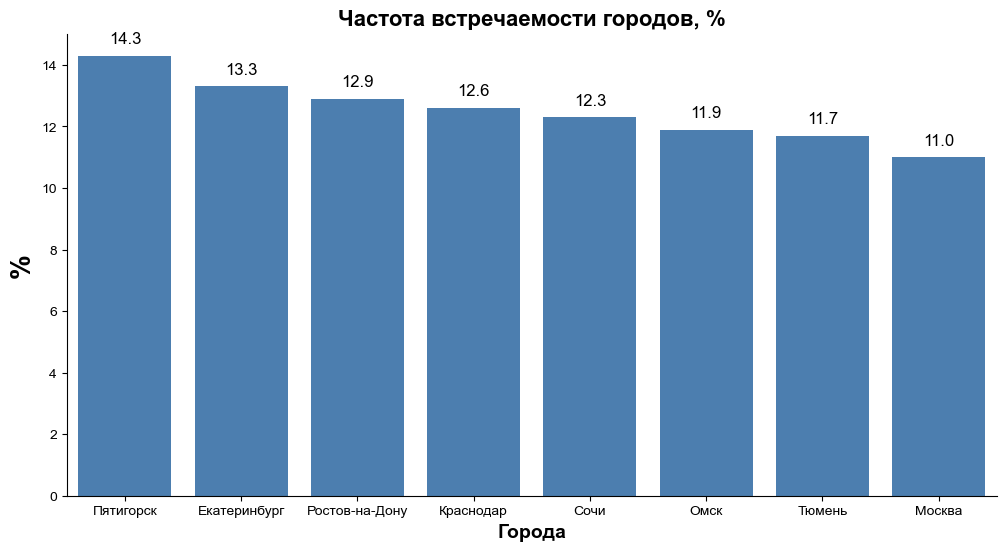

In [18]:
plt.figure(figsize=(12,6))

splot = sns.barplot(
            data=city,
            x='city', 
            y='count_%',
            color='#0A5EB0',       # цвет столбцов
            alpha=0.8
           )
#добавляем подписи к столбцам со значением   
for p in splot.patches: 
    splot.annotate(format(round(p.get_height(), 3), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', 
                   size=12, 
                   xytext=(0, 12), 
                   textcoords='offset points')
#подписываем график
plt.title('Частота встречаемости городов, %',
         fontsize=16, fontweight="bold")

plt.xlabel('Города',
          fontsize=14, fontweight="bold")
plt.ylabel('%',
          fontsize=20, fontweight="bold")
plt.grid(False)
# цвет подложки one of {darkgrid, whitegrid, dark, white, ticks}
sns.set_style("whitegrid")

#уберем границы в графике-despine удаляет правую и верхнюю границы 
sns.despine()
#выводим график
plt.show()

8 городов поделили пользователей в пределах 11%-14.3%. Нельзя сказать, что поровну, но и без больших перекосов.

Лидер среди городов - Пятигорск на него приходится 14.3% всех пользователей, а меньше всего у Москвы - там 11%.

### Пользователи с подпиской и без подписки
Найдем соотношение пользователей с подпиской и без подписки.

Для этого составим сводную таблицу датафрейма users. Тип подписки указан в столбце subscription_type.
#### Таблица пользователей в разрезе подписки

In [19]:
subscription_type = users.copy(deep=True) 
subscription_type = subscription_type.pivot_table(
    index='subscription_type',
    values = 'user_id',
    aggfunc='count'
).reset_index()
subscription_type.rename(columns={'user_id':'count'}, 
                      inplace=True)
subscription_type['count_%'] = round((subscription_type['count'] * 100 / 
                                subscription_type['count'].sum()), 1)
subscription_type

,subscription_type,count,count_%
0,free,835,54.4
1,ultra,699,45.6


#### График: Пайчат пользователей с подпиской и без

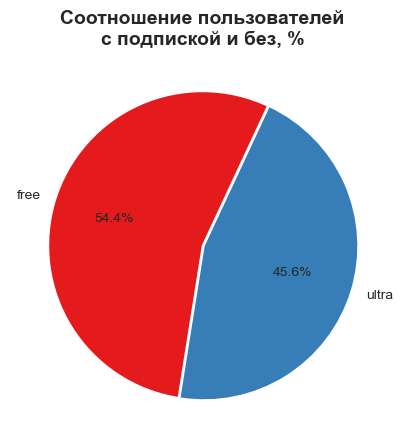

In [20]:
# зададим размеры фигуры
plt.figure(figsize=(5,5))
# определим расстояние междучастями пайчарта
explode = [0, 0.01] 
# определим цветовую палитру 
palette_color = sns.color_palette('Set1') 
  
# задаем параметры для пайчарта
plt.pie(subscription_type['count'], 
        labels=subscription_type['subscription_type'], 
        colors=palette_color, 
        explode=explode, 
        startangle=65, # поворот пайчарта
        autopct='%.1f%%') 
 #подписываем график
plt.title('Соотношение пользователей\nс подпиской и без, %',
         fontsize=14, fontweight="bold")

#выводим график
plt.show()  

In [21]:
# считаем если с подпиской больше
if (len(users.query('subscription_type == "ultra"')) > 
    len(users.query('subscription_type == "free"'))):
    print('Доля пользователей c подпиской больше на  {} %'.format(
    round(
         ((len(users.query('subscription_type == "ultra"')) / len(users)) - 
    ( 1 - (len(users.query('subscription_type == "ultra"')) / len(users)) ) 
         )
    * 100, 1)
                                                     )
     )
    print('Доля пользователей c подпиской равна {} %'.format(
    round(
         ((len(users.query('subscription_type == "ultra"')) / len(users))  
         )
    * 100, 1)
    ))
    print('Доля пользователей без подписки равна {} %'.format(
    round(
         ((len(users.query('subscription_type == "free"')) / len(users))  
         ) * 100, 1)
    ))
# считаем если без подписки больше    
elif (len(users.query('subscription_type == "free"')) > 
    len(users.query('subscription_type == "ultra"'))):
    print('Доля пользователей без подписки больше на {} %.'.format(
    round(
         ((len(users.query('subscription_type == "free"')) / len(users)) - 
    ( 1 - (len(users.query('subscription_type == "free"')) / len(users)) ) 
         )
    * 100, 1)
                                                     ))
    print('Доля пользователей без подписки равна {} %'.format(
    round(
         ((len(users.query('subscription_type == "free"')) / len(users))  
         ) * 100, 1)
    ))
    print('Доля пользователей с подпиской равна {} %'.format(
    round(
         ((len(users.query('subscription_type != "free"')) / len(users))  
         ) * 100, 1)
    )                
         )      

Доля пользователей без подписки больше на 8.9 %.
Доля пользователей без подписки равна 54.4 %
Доля пользователей с подпиской равна 45.6 %


### Возраст пользователей.
Сгруппируем данные о возрасте пользователей и сохраним в датафреме ages. Найдем минимальный и максимальный возраст пользователей.

In [22]:
# сделаем копию датафрейма
ages = users.copy(deep=True)
# сгруппируем данные, сбросим индексы, отсортируем по возрасту
ages = ages.age.value_counts().reset_index().sort_values(by='age')
# добавим столбец с долей по возрасту
ages['count_%'] = ages['count'] * 100 / ages['count'].sum()
# найдем мин и макс возраста
print('Возраст пользователей от {} до {}\
.'.format(min(ages['age']), max(ages['age'])))

Возраст пользователей от 12 до 43.


#### График: Доля каждого возраста пользователей, %',

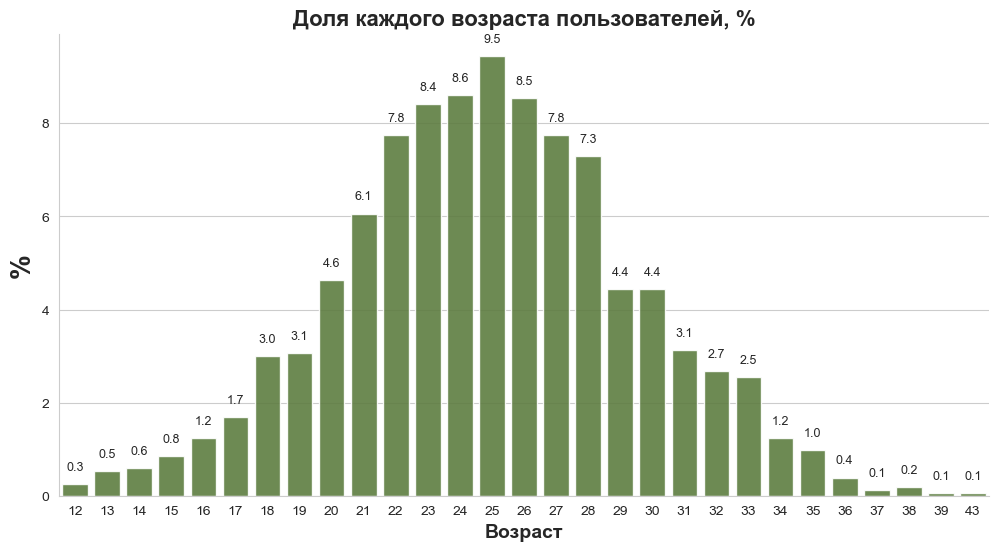

In [23]:
plt.figure(figsize=(12,6))

splot = sns.barplot(
            data=ages,
            x='age', 
            y='count_%',
            color='#5D8736',       # цвет столбцов
            alpha=0.9
           )
#добавляем подписи к столбцам со значением   
for p in splot.patches: 
    splot.annotate(format(round(p.get_height(), 3), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', 
                   size=9, 
                   xytext=(0, 12), 
                   textcoords='offset points')
#подписываем график
plt.title('Доля каждого возраста пользователей, %',
         fontsize=16, fontweight="bold")

plt.xlabel('Возраст',
          fontsize=14, fontweight="bold")
plt.ylabel('%',
          fontsize=20, fontweight="bold")
# цвет подложки one of {darkgrid, whitegrid, dark, white, ticks}
sns.set_style("whitegrid")

#уберем границы в графике-despine удаляет правую и верхнюю границы 
sns.despine()
#выводим график
plt.show()

In [24]:
print('Средний возраст пользователя {} лет.\
'.format(int(users['age'].mean().round(0))))
print('Медианный возраст пользователя {} лет.\
'.format(round(users['age'].median())))
users['age'].describe()

Средний возраст пользователя 25 лет.
Медианный возраст пользователя 25 лет.


count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

По 25% пользователей находятся в возрасте от 12 до 21 года включительно или от 29 лет до 43 лет включительно в каждой из групп. 

Больше всего пользователей - это половина от общего числа - это молодые люди в возрасте от 22 до 28 лет включительно.


### Дальность поездок пользователей
Найдем расстояние, которое пользователь преодолел за одну поездку.

Посмотрим на описательные статистики по столбцу distance датафрейма rides.

In [25]:
rides['distance'].round().describe()

count    18068.000000
mean      3070.659010
std       1116.832209
min          1.000000
25%       2543.000000
50%       3134.000000
75%       3776.000000
max       7211.000000
Name: distance, dtype: float64

Всего датафрейм содержит данных о 18068 поездках.

Поездки осуществлялись на расстояние (округленно) от 1 метра до 7211 метров.

Половина поездок была на расстоение (округленно) от 2543 до 3776 метров.

#### График: Дальность поездок пользователей

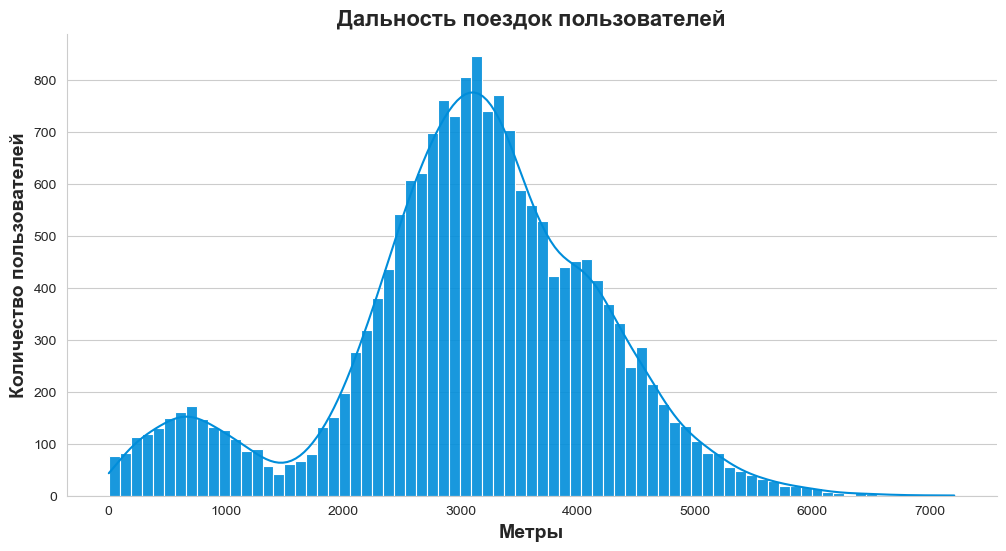

In [26]:
plt.figure(figsize=(12,6))

sns.histplot(
            data=rides,
            x='distance', 
            stat='count',
            kde=True,
            color='#008DDA',       # цвет столбцов
            alpha=0.9
           )

#подписываем график
plt.title('Дальность поездок пользователей',
         fontsize=16, fontweight="bold")

plt.xlabel('Метры',
          fontsize=14, fontweight="bold")
# цвет подложки one of {darkgrid, whitegrid, dark, white, ticks}
sns.set_style("whitegrid")
plt.ylabel('Количество пользователей',
          fontsize=14, fontweight="bold")
plt.grid(axis='x')
#уберем границы в графике-despine удаляет правую и верхнюю границы 
sns.despine()
#выводим график
plt.show()


На графике можно выделить две группы пользователей. Одни совершают короткие поездки приблизительно  до 1500 метров, вторая - самая многочисленная группа, совершают поездки от 1500 до 7211 метров(макисмальное значение).

### продолжительность поездок.
Найдем длительность по времени поездок пользователей..

Посмотрим на описательные статистики по столбцу duration датафрейма rides. Данные округлим до целых минут.

In [27]:
rides['duration'].round().describe()

count    18068.000000
mean        17.803852
std          6.104153
min          0.000000
25%         14.000000
50%         18.000000
75%         22.000000
max         41.000000
Name: duration, dtype: float64

Есть поездки менее 1 минуты, а максимальное время 41 минута. Половина поездок совершается от 14 до 22 минут. Медианное время поездок 18 минут. Оно приближено к среднему 17.8 минут, значит данные распределены практически нормально, без перекосов.

#### График: Длительость поездок  пользователей

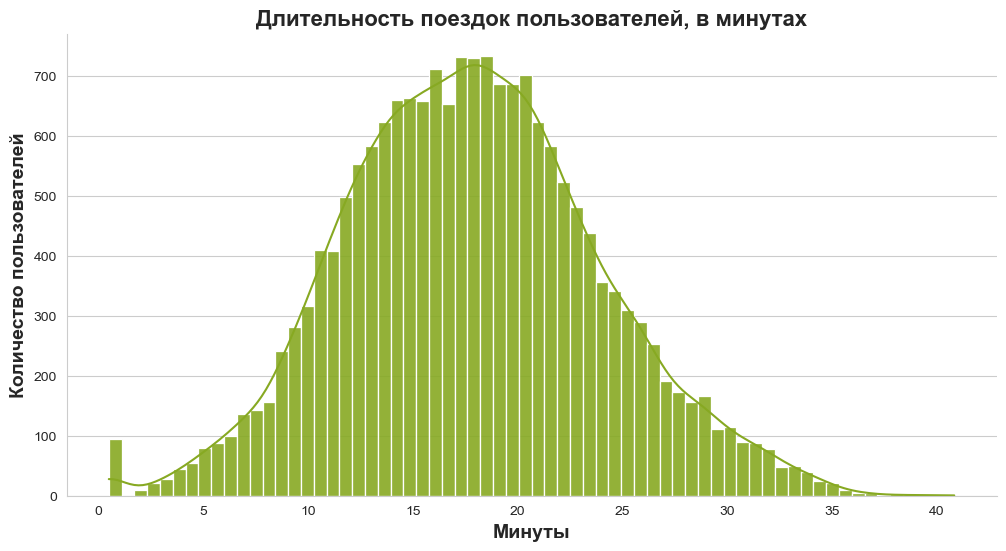

In [28]:
plt.figure(figsize=(12,6))

sns.histplot(
            data=rides,
            x='duration', 
            stat='count',
            kde=True,
            color='#87A922',       # цвет столбцов
            alpha=0.9
           )

#подписываем график
plt.title('Длительность поездок пользователей, в минутах',
         fontsize=16, fontweight="bold")

plt.xlabel('Минуты',
          fontsize=14, fontweight="bold")
# цвет подложки one of {darkgrid, whitegrid, dark, white, ticks}
sns.set_style("whitegrid")
plt.ylabel('Количество пользователей',
          fontsize=14, fontweight="bold")
plt.grid(axis='x')
#уберем границы в графике-despine удаляет правую и верхнюю границы 
sns.despine()
#выводим график
plt.show()

За исключением выброса по длительности около 0 минут для примерно 100 пользователей, график распределен нормально.

Длительность поездки менее минуты - это скорее всего ситуации. когда пользователь решил отказаться от поездки, а вот причину такого решения неплохо бы поизучать. Поломанный самокат, передумал, трудности с использованием самоката, не прошла оплата и т.д.

### Итоги шага 3

8 городов поделили пользователей в пределах 11%-14.3%. Нельзя сказать, что поровну, но и без больших перекосов.

Лидер среди городов - Пятигорск на него приходится 14.3% всех пользователей, а меньше всего у Москвы - там 11%.

Доля пользователей без подписки равна 54.4 %, она больше на 8.9 % чем у пользователей с подпиской, которых 45.6 % соответственно.

Половина пользователей - молодые люди в возрасте от 22 до 28 лет включительно. Остальная половина это группы по 25% пользователей в каждой из групп в возрасте от 12 до 21 года включительно и от 29 лет до 43 лет включительно соответственно.

Стоит обратить внимание на поездки длительностью менее 1 минуты, скорее всего такая длительность в результате отказа пользователя (по какой-то из причин) от сервиса. 

Максимальное время поездки 41 минута. Половина поездок совершается от 14 до 22 минут. Медианное/среднее время поездок 18 минут (округленно). Половина поездок совершаетя в диапазоне от 14 до 22 минут включительно.


## Шаг 4: Объединение данных

### Округление чисел

Для удобства восприятия данных округлим значения с помощью метода "потолок" в колонках датафрейма rides:

 - distance - дистанция до метров, т.е. до целых чисел,
 - duration - продолжительность поездки - значения округлим до целых минут.
 
Типы данных в этих колонках после округления преобразуем в целочисленный int.

In [29]:
#  поменяем тип данных
for column in ['distance', 'duration']:
    rides[column] = rides[column].apply(np.ceil).astype(int)
    print(f'\nПосле преобразования тип данных - в столбцe {column}:\n\
{rides[column].dtypes}')
# выведем пару случайных строк    
rides.sample(n=2, random_state=1)


После преобразования тип данных - в столбцe distance:
int32

После преобразования тип данных - в столбцe duration:
int32


,user_id,distance,duration,date,month
4019,433,2595,21,2021-07-06,7
9183,900,2580,17,2021-03-10,3


### Общий датафрейм  о пользователях, поездках и подписках
Объединим данные о пользователях, поездках и подписках в один датафрейм `data`. Для этого воспользуемся методом merge().

Датафрейм rides обогатим информацией о пользователях из датафрейма users по столбцу user_id. Затем  добавим информацию о тарифах из датафрейма subscr по столбцу subscription_type.



In [30]:
# добавляем информацию о пользователях
data = rides.merge(users, how='left', on='user_id')

In [31]:
# добавляем информацию о тарифах
data = data.merge(subscr, how='left', on='subscription_type')

In [32]:
# выведем одну строку объед.датафрейма, транспонируем для удобства
data.head(1).T

,0
user_id,1
distance,4410
duration,26
date,2021-01-01 00:00:00
month,1
name,Кира
age,22
city,Тюмень
subscription_type,ultra
minute_price,6


### Датафреймы пользователи с подпиской и без
Создадим ещё два датафрейма на основе датафрейма data:
- c данными о пользователях без подписки - free_type;
- с данными о пользователях с подпиской - ultra_type.

In [33]:
# копируем датафрейм
ultra_type = data.copy(deep=True)
# записываем срез по пользоват. с подпиской в датафрейм
ultra_type = ultra_type[ultra_type['subscription_type'] == 'ultra']

# копируем датафрейм
free_type = data.copy(deep=True)
# записываем срез по пользоват. без подписки в датафрейм
free_type  = free_type[free_type['subscription_type'] == 'free']

if len(data) == (len(ultra_type) + len(free_type)):
    print('Датафреймы о пользователях с подпиской и без подписки \
созданы успешно!')
    print('Cлучайная строка из датафрейма ultra_type:')
    display(ultra_type.sample(n=1, random_state=1).T)
    print('Cлучайная строка из датафрейма free_type:')
    display(free_type.sample(n=1, random_state=1).T)
else:
    print('Achtung!!!')

Датафреймы о пользователях с подпиской и без подписки созданы успешно!
Cлучайная строка из датафрейма ultra_type:


,3773
user_id,405
distance,3002
duration,14
date,2021-11-11 00:00:00
month,11
name,Руслан
age,22
city,Екатеринбург
subscription_type,ultra
minute_price,6


Cлучайная строка из датафрейма free_type:


,16868
user_id,1449
distance,3709
duration,22
date,2021-02-14 00:00:00
month,2
name,Софья
age,28
city,Москва
subscription_type,free
minute_price,8


Успешно разделили данные по подписке, теперь можно рассмотреть пользователей по категориям с подпиской и без. Есть ли отличия.

### График: Расстояние поездок для групп с подпиской и без
Визуализируем информацию о расстоянии поездок для пользователей обеих категорий.

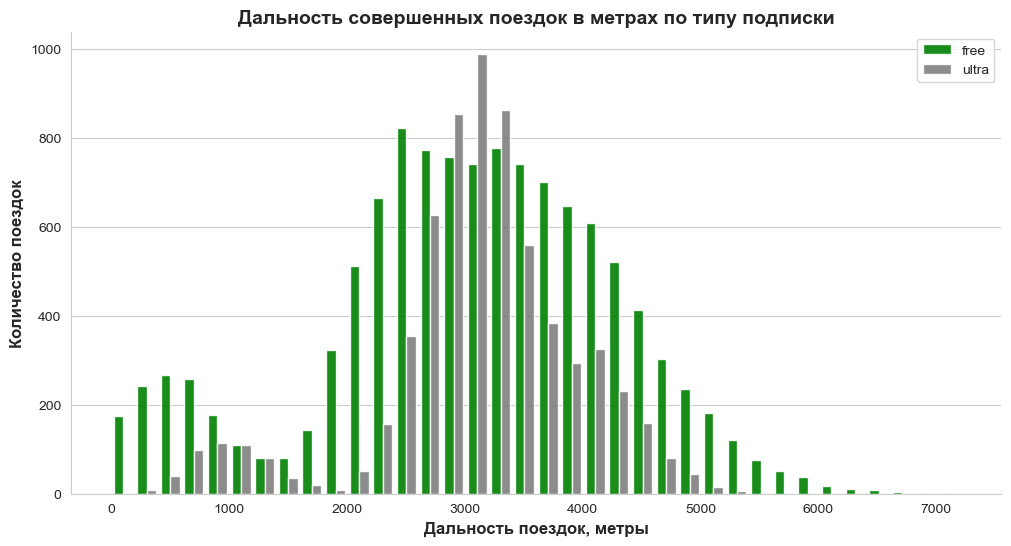

In [34]:
# зададим размеры фигуры
plt.figure(figsize=(12,6))
# совместим два графика на одном
plt.hist([free_type['distance'], 
          ultra_type['distance']], 
         bins=36,
         alpha=0.9, 
         color=['green', 'grey'], 
         label=['free', 'ultra'])
# сместим легенду
plt.legend(loc='upper right')
plt.title('Дальность совершенных поездок в метрах по типу подписки',
         fontsize=14, fontweight="bold")
plt.xlabel('Дальность поездок, метры',
          fontsize=12, fontweight="bold")
plt.ylabel('Количество поездок',
          fontsize=12, fontweight="bold")
plt.grid(axis='x')
#уберем границы в графике-despine удаляет правую и верхнюю границы 
sns.despine()
plt.show()

График разделен условно на две группы пользователей, причем это справедливо как для пользователей с подпиской, так и без. На короткие поездки и на более длительные поездки.

Посмотрим на поездки ограниченные 2000 метров. Это интересно посмотреть, так как в этом диапазоне заканчивается и начинается рост количества поездок у пользователей с подпиской, также этот диапазон перекрывает и пользователей без подписки. Такое ограничение даст возможность рассмотреть ближе характеристики расстояний для коротких поездок.

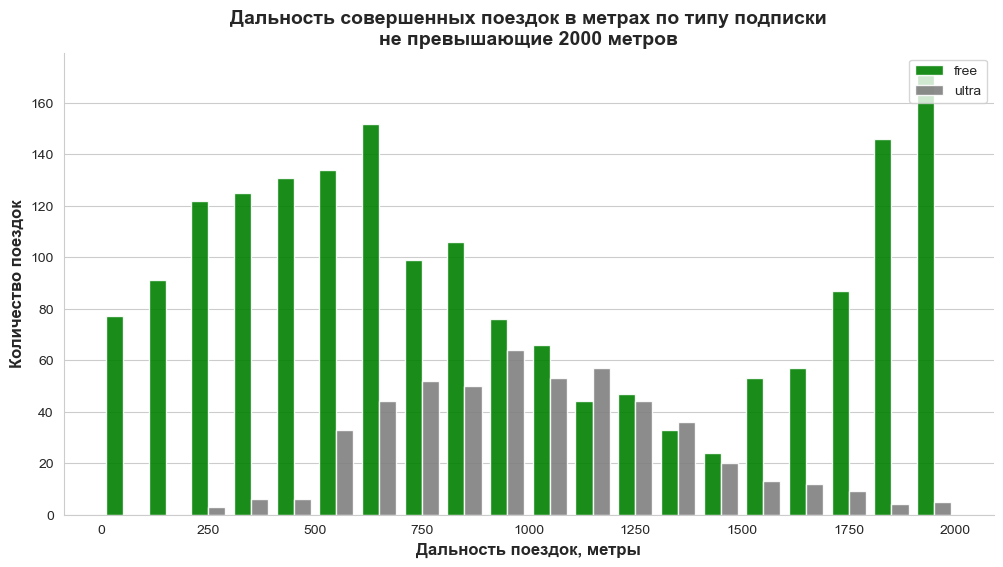

In [35]:
# зададим размеры фигуры
plt.figure(figsize=(12,6))
# совместим два графика на одном
plt.hist([free_type['distance'], 
          ultra_type['distance']], 
         bins=20,
         alpha=0.9, 
         color=['green', 'grey'], 
         label=['free', 'ultra'],
         range=(0, 2000))
# сместим легенду
plt.legend(loc='upper right')
plt.title('Дальность совершенных поездок в метрах по типу подписки\n\
не превышающие 2000 метров',
         fontsize=14, fontweight="bold")
plt.xlabel('Дальность поездок, метры',
          fontsize=12, fontweight="bold")
plt.ylabel('Количество поездок',
          fontsize=12, fontweight="bold")
plt.grid(axis='x')
#уберем границы в графике-despine удаляет правую и верхнюю границы 
sns.despine()
plt.show()

Для пользователи без подписки характерно большее число коротких поездок, а также количество совершаемых самых коротких поездок их диапазон от 0 до примерно 1400 метров с более длинным правым хвостом. Это не удивительно. Если человеку не понравилось ехать на самокате, или он понял, что для него это дискомфортно, то он прекратит поездку и не купит подписку.

Для пользователей с подпиской распределение более равномерно, но ткже есть длинный правый хвост. Поездки совершаются на расстояние от 250 до 2000 метров.

Посмотрим на промежуток поездок от 2000 метров

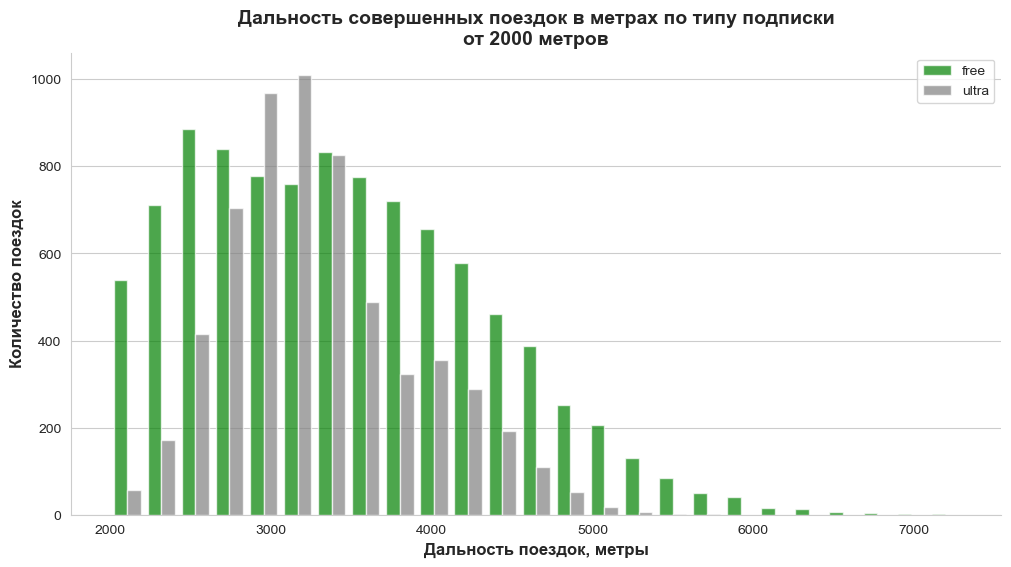

In [36]:
# зададим размеры фигуры
plt.figure(figsize=(12,6))
# совместим два графика на одном
plt.hist([free_type['distance'], 
          ultra_type['distance']], 
         bins=25,
         alpha=0.7, 
         color=['green', 'grey'], 
         label=['free', 'ultra'],
         range=(2001, 7300))
# сместим легенду
plt.legend(loc='upper right')
plt.title('Дальность совершенных поездок в метрах по типу подписки\n\
от 2000 метров',
         fontsize=14, fontweight="bold")
plt.xlabel('Дальность поездок, метры',
          fontsize=12, fontweight="bold")
plt.ylabel('Количество поездок',
          fontsize=12, fontweight="bold")
plt.grid(axis='x')
#уберем границы в графике-despine удаляет правую и верхнюю границы 
sns.despine()
plt.show()

От 2000 метров поездки также совершают чаще пользователи без подписки. Поездки от 3000 до 3250 метров чаще всего совершают подьзователи с подпиской. 

Существенное увеличение Пользователей с подпиской начинается от дальности поездки примерно 2800 метров до 3500 метров. И далее снижается. При этом пользователей без подписки больше как на коротких дистанциях, та и на длинных, за исключением промежутка от 3000 до 3250, где больше всего пользователей с подпиской.

### График: Продолжительность поездок для групп с подпиской и без
Визуализируем информацию о времени поездок для пользователей обеих категорий.

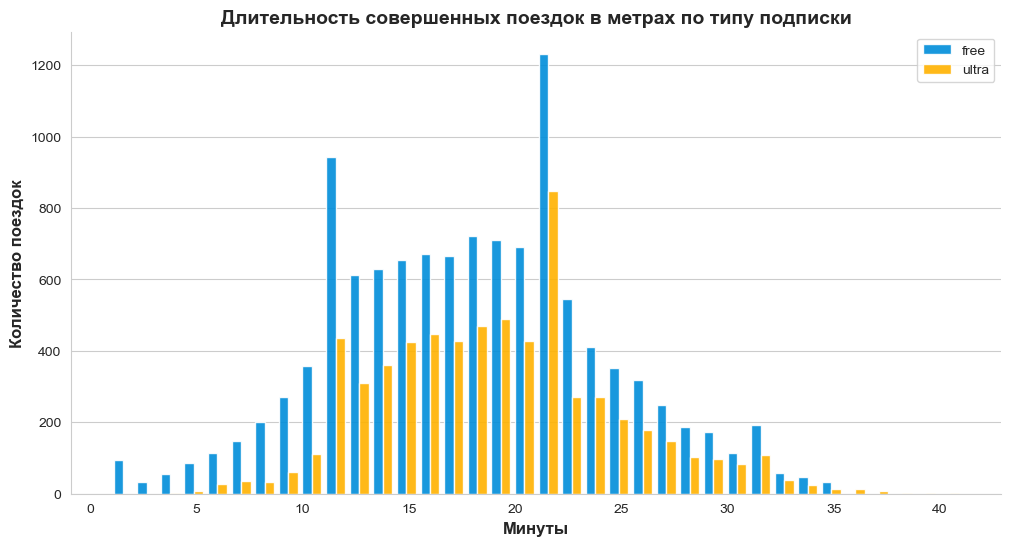

In [37]:
# зададим размеры фигуры
plt.figure(figsize=(12,6))
# совместим два графика на одном
plt.hist([free_type['duration'], 
          ultra_type['duration']], 
         bins=36,
         alpha=0.9, 
         color=['#008DDA', '#FFB200'], 
         label=['free', 'ultra'])
# сместим легенду
plt.legend(loc='upper right')
plt.title('Длительность совершенных поездок в метрах по типу подписки',
         fontsize=14, fontweight="bold")
plt.xlabel('Минуты',
          fontsize=12, fontweight="bold")
plt.ylabel('Количество поездок',
          fontsize=12, fontweight="bold")
plt.grid(axis='x')
#уберем границы в графике-despine удаляет правую и верхнюю границы 
sns.despine()
plt.show()

Видим нормальное распределение как для пользователей с подпиской, так и для пользователей без подписки.

Виден возможный выброс в промежутке от 0 до 5 минут для пользователей без подписки.

### Итоги шага 4

Если сравнивать пользователей между собой по количеству поездок и длительности, то по количеству коротких поездок  до 35 минут - лидируют пользователей без подписки. Зато лидерами самых длительных поездок являются пользователи с подпиской от 35 до 41 минуты есть только они.

Аудитория, которую можно привлечь для оплаты подписки есть.

Посмотрим, кто приносит больше выручкки.


## Шаг 5: Выручка по разным категориям пользователей.
Посчитаем выручку от поездок. Для этого сгруппируем данные о поездках для каждого пользователя за каждый месяц. А затем добавим информацию о помесячной выручке, которую принёс каждый пользователь.

### Датафрейм с данными о поездках

Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными data: найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.Добавим также информацию о стоиомсти минуты, стоиомсти старта и стоиомсти подписки. Это поможет рассчитать выручку.

In [38]:
# сделаем копию дф
users_values = data.copy(deep=True)
# сформируем сводную таблицу
users_values = users_values.pivot_table(
    index=('month', 'user_id'),
    values=(
    'distance', 
    'duration', 
    'minute_price', 
    'start_ride_price', 
    'subscription_fee'
    ),
    aggfunc=({'distance':{'count','sum'},
              'duration':'sum',
              'minute_price':'mean',
              'start_ride_price':'mean',
              'subscription_fee':'mean'})
)
# переименуем столбцы
users_values.columns = [
    'cnt', 'distance', 
    'duration', 
    'min_price',
    'start_price', 
    'fee'
]
users_values.sample(n=6, random_state=6)

,,cnt,distance,duration,min_price,start_price,fee
month,user_id,,,,,,
11,1330,2,6230,33,8.0,50.0,0.0
5,191,1,2851,15,6.0,0.0,199.0
12,142,1,4584,26,6.0,0.0,199.0
2,1138,1,296,3,8.0,50.0,0.0
3,1008,4,12818,68,8.0,50.0,0.0
5,1320,1,3084,30,8.0,50.0,0.0


### Выручка по пользователям и месяцам

В этот же датафрейм добавим столбец с помесячной выручкой, которую принёс каждый пользователь. 
```
Помесячная выручка считается по формуле: 
    (стоимость старта поездки ×  количество поездок)
      + 
    (стоимость одной минуты поездки × общая продолж-ть всех поездок в минутах)
      + стоимость подписки.
```

In [39]:
# добавляем столбцец с выручкой
users_values['amount'] = (
    users_values.start_price * users_values.cnt +
    users_values.min_price * users_values.duration + 
    users_values.fee
                        )

In [40]:
# выведем несколько случайных строк с результатом
users_values.sample(n=3, random_state=1)

,,cnt,distance,duration,min_price,start_price,fee,amount
month,user_id,,,,,,,
2,718,1,5198,1,8.0,50.0,0.0,58.0
3,1219,1,3679,12,8.0,50.0,0.0,146.0
1,1243,1,542,5,8.0,50.0,0.0,90.0


In [41]:
# посомтрим на пользователя 718 - случайная находка аномалии
data.query('user_id == 718')

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
6768,718,5198,1,2021-02-11,2,Владислава,31,Москва,free,8,50,0
6769,718,2590,22,2021-04-01,4,Владислава,31,Москва,free,8,50,0
6770,718,4148,23,2021-04-11,4,Владислава,31,Москва,free,8,50,0
6771,718,3827,13,2021-05-02,5,Владислава,31,Москва,free,8,50,0
6772,718,3703,16,2021-05-08,5,Владислава,31,Москва,free,8,50,0
6773,718,4009,23,2021-05-28,5,Владислава,31,Москва,free,8,50,0
6774,718,2439,9,2021-06-18,6,Владислава,31,Москва,free,8,50,0
6775,718,3589,13,2021-08-04,8,Владислава,31,Москва,free,8,50,0
6776,718,3749,18,2021-09-14,9,Владислава,31,Москва,free,8,50,0
6777,718,4414,32,2021-10-26,10,Владислава,31,Москва,free,8,50,0


Получили данные по выручке, а также случайную находку - пользователь 718 в феврале за 1 минуту проехал 5198 метров.

Так как у нас нет дополнительных данных о таких ситуациях, то просто отметим, что в данных есть возможные аномалии. Они могут объясняться как особенностями какой-то акции, когда пользователь получает поездку стоимостью за 1 минуту, а также это может быть ошибка сервиса, требующая отдельного анализа. В рамках данного проекта эта информация не будет анализироваться.

#### Выручка за год

In [42]:
print ('Выручка по всем пользователям: {} рублей\
'.format(users_values['amount'].sum()))


Выручка по всем пользователям: 3878641.0 рублей


### Средняя выручка по месяцам

Посчитаем среднюю выручку от поездок за месяц по пользователям с подпиской (в столбце fee будет указана стоимость 199) и без подписке (в столбце fee стоиомсть 0) . Для этого сгруппируем данные о поездках для каждого пользователя за каждый месяц. А затем добавим информацию о помесячной выручке, которую принёс каждый пользователь.


In [43]:
print('Средняя выручка за месяц от одного пользователя \
с подпиской равна {} рублей'.format(users_values.query('fee == 199')['amount']
.mean().round(0))
     )

Средняя выручка за месяц от одного пользователя с подпиской равна 363.0 рублей


In [44]:
print('Средняя выручка за месяц от одного пользователя \
без подписки равна {} рублей'.format(users_values.query('fee == 0')['amount']
.mean().round(0))
     )

Средняя выручка за месяц от одного пользователя без подписки равна 329.0 рублей


### Итоги Шага 5

Средняя месячная выручка от пользователя с подпиской больше на 10%, чем от пользователя без подписки, а именно:
 - с подпиской 363.0 рублей, 
 - без подписки 329.0 рублей.


## Шаг 6. Проверка гипотез
Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции. Для этого выясним несколько важных моментов.

### Пользователи с подпиской тратят больше времени на поездки

Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверим эту гипотезу. 

Для этого используйем исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

Будем сравнивать данные двух дата сетов и сравнивать среднее двух генеральных совокупностей: 

- **ultra_type** -собраны данные с пользователями с типом потдписки ultra, 
- **free_type** собраны данные с пользователями с типом потдписки free.

Сформулируем нулевую и альтернативную гипотезы:

 - **Нулевая гипотеза:**  Среднее время   поездки пользователя с подпиской ultra и без подписки равны.
 - **Альтернативная гипотеза:** Среднее время   поездки пользователя с подпиской ultra больше, чем среднее  время   поездки пользователя без подписки.
 
Используем: 
 - метод ttest_ind()
 - укажем сначала выборку с временем пользователей с подпиской (`ultra_type['duration']`), затем выборку с времнем пользователей без подписки (`free_type['duration']`)
 
Установим:
 - уровень статистической значимости в пределах конвенциальных значений 5%.
 - параметр alternative='greater'

In [45]:
# задаём уровень стат. значимости
alpha = .05

# проводим ttest для двух выборок, в качестве альтернативной 
# используем одностороннюю гипотезу «больше»
results = st.ttest_ind(ultra_type['duration'], 
                       free_type['duration'],
                       alternative='greater')
print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу\n')
    print('Значение p-value меньше заданного уровня стат. значимости')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')
    print('Значение p-value больше заданного уровня стат. значимости')


p-value: 2.4959453720736625e-34
Отвергаем нулевую гипотезу

Значение p-value меньше заданного уровня стат. значимости


При уровне значимости 5% нет оснований отрицать, что среднее время поездки пользователя с подпиской ultra больше, чем среднее время поездки пользователя без подписки.

### Расстояние поездок пользователя с подпиской до 3130 метров

Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката.  

Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает3130 метров? Проверим гипотезу и сделаем выводы.

Важно понять, проезжает ли пользователи с подпиской расстояние не больше чем 3130 в среднем за одну поездку или это расстояние больше чем 3130 метров.

Если пользователь с подпиской проездает не более чем 3130 метров за одну поездку, то самокаты не подвергаются излишнему износу. Проверим эту гипотезу. 

Для этого используйем исходные данные о расстоянии, которое проезжает пользователь в ходе каждой сессии —  для подписчиков.



Сформулируем нулевую и альтернативную гипотезы:

 - **H0:**  Среднее значение distance пользователей по подписке ultra равно  3130 метров.
 - **H1:**  Среднее значение distance пользователей по подписке ultra больше 3130 метров.
 
Используем: 
 - метод scipy.stats.ttest_1samp()
 - `ultra_type['distance']` - данные о расстоянии, которое проезжает пользователь в ходе каждой сессии
  
Установим:
 - уровень статистической значимости в пределах конвенциальных значений 5%.
 - параметр alternative='greater'для правосторонней H1, P-value, которое выдаст метод, будет рассчитываться для правого хвоста распределения.
 - optimal_distance = 3130.0 -оптимальное расстояние по износу составляет 3130 м, значит большее расстояние приводит к повышенному износу самоката.

In [46]:
optimal_distance = 3130.0
alpha = 0.05
results_2 = st.ttest_1samp(ultra_type['distance'], 
                           optimal_distance, 
                           alternative='greater')

print(f'p-значение: {results_2.pvalue}')
if results_2.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.\n\
Значение p-value меньше заданного уровня статистической значимости.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.\n\
Значение p-value больше заданного уровня статистической значимости.')

p-значение: 0.9120422337080507
Не получилось отвергнуть нулевую гипотезу.
Значение p-value больше заданного уровня статистической значимости.


Можно утверждать что среднее расстояние одной поездки в метрах у пользователей с подпиской ultra, не превышает оптимальное расстояние (с точки зрения износа самоката) в 3130 метров для одной поездки. Что хорошо скажется на сроке службы самоката.

### Помесячная выручка от пользователей с подпиской по месяцам выше

Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделаем вывод.

Выдвинем гипотезы:

Н0: Помесячная средняя выручка от пользователей с подпиской ultra равна помесячной средней выручке от пользователей без подписки free.
                             
Н1: Помесячная средняя выручка от пользователей с подпиской ultra больше помесячной средней выручки от пользователей без подписки free.

Для проверки гипотезы используем срезы данных датафрейма **users_values** о выручке по пользователям с подпиской ultra и без подписки free: ultra_month_value и free_month_value



In [47]:
users_values

cnt  distance  duration  min_price  start_price    fee  amount
month user_id                                                                
1     1          2      7028        42        6.0          0.0  199.0   451.0
      3          1      3062        13        6.0          0.0  199.0   277.0
      5          1      3915        13        6.0          0.0  199.0   277.0
      7          2      6479        28        6.0          0.0  199.0   367.0
      12         1      3578        33        6.0          0.0  199.0   397.0
...            ...       ...       ...        ...          ...    ...     ...
12    1525       1      4598        34        8.0         50.0    0.0   322.0
      1526       1      3645        23        8.0         50.0    0.0   234.0
      1528       1      3999        11        8.0         50.0    0.0   138.0
      1532       2      6113        42        8.0         50.0    0.0   436.0
      1534       1      2372        16        8.0         50.0    0.0   178.0

[11331 rows x 7 columns]

In [48]:
# делаем копии дф
ultra_month_value = users_values.copy(deep=True)
free_month_value = users_values.copy(deep=True)

# данные по пользователям с подпиской
ultra_month_value  = (ultra_month_value
                      .loc[ultra_month_value ['fee'] > 0, 
                           'amount'])
# данные по пользователям без подписки
free_month_value = (free_month_value
                    .loc[free_month_value['fee'] == 0, 
                         'amount'])

# уровень стат.значимости
alpha = .05
results_3 = st.ttest_ind(
            ultra_month_value, 
            free_month_value, 
            alternative='greater')

print(f'p-значение: {results_3.pvalue}')    

if results_3.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.\n\
Полученное значение p-value меньше заданного уровня значимости.')
else:
    print('Нет оснований отвергнуть нулевую гипотезу\n\
Полученное значение p-value больше заданного уровня значимости.')

p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу.
Полученное значение p-value меньше заданного уровня значимости.


Нет оснований отрицать, что помесячная средняя выручка от пользователей с подпиской ultra больше помесячной средней выручки от пользователей без подписки free. Гипотеза, которая утверждала, что помесячная средняя выручка от пользователей с подпиской ultra равна помесячной средней выручке от пользователей без подписки free была отвергнута в ходе проверки.

### Тест для проверки гипотезы для тех.поддержки

Смоделируем такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Техническая команда сервиса надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. 

Какой тест вам понадобился бы для проверки этой гипотезы?

Так как мы рассматриваем  одну генеральную совокупность до и после какого-либо изменения, нужно использовать `Гипотезу о равенстве средних для зависимых (парных) выборок`
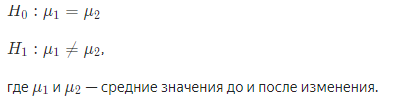


Выдвинем гипотезы:

Н0: Количество обращений в техподдержку до и после обновления сервера равно.
                             
Н1: Количество обращений в техподдержку после обновления сервера меньше, чем до обновления сервера.

Используем: 
 - метод scipy.stats.ttest_rel()
 - два параметра: наборы о количестве обращений до обновления и после него. 
  
Установим:
 - уровень статистической значимости в пределах конвенциальных значений 5%.

## Шаг 7: Распределения

### Акция с промокодами
Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж.
Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

Подсказка

Нужно использовать биномиальное распределение, которое описывает указанную ситуацию. Затем подобрать подходящее значение параметра N для заданного параметра p=0.1 с помощью графиков и метода cdf() , сформулировать вывод и ответ.

### Push-уведомления в мобильном приложении
Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около40 % получивших клиентов. Отдел планирует разослать1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более399,5 тыс. пользователей.

Подсказка

Эта ситуация тоже описывается биномиальным распределением. Но считать каждое отдельное значение достаточно долго. Вы можете воспользоваться нормальной аппроксимацией биномиального распределения и cdf() для быстрой оценки.

## Итоговый вывод